In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization

In [2]:
img_size=150
batch_size=25

traingen=ImageDataGenerator(rescale=1/255.,
                           rotation_range=50,
                        brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.)

In [3]:
traindata=traingen.flow_from_directory('C:\\Users\\LENOVO G3\\Downloads\\Pneumonia\\chest_xray\\train',
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='binary'
                                      ,color_mode='grayscale')

testdata=testgen.flow_from_directory('C:\\Users\\LENOVO G3\\Downloads\\Pneumonia\\chest_xray\\test',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode='binary',color_mode='grayscale')
valdata=valgen.flow_from_directory('C:\\Users\\LENOVO G3\\Downloads\\Pneumonia\\chest_xray\\val',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode='binary',color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


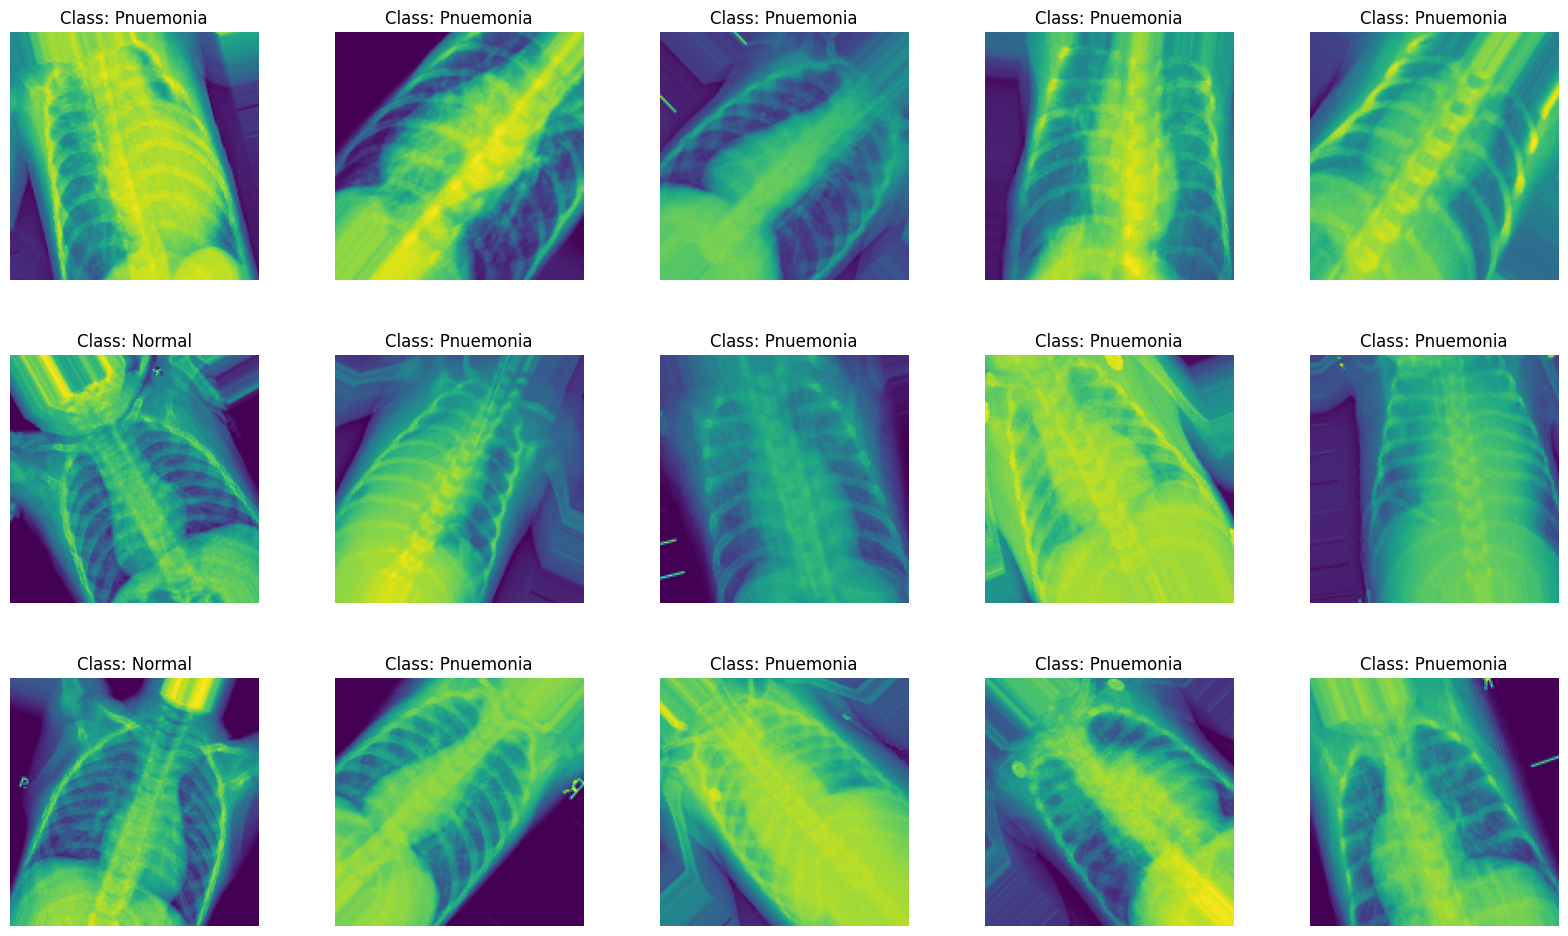

In [4]:
labels=['Normal','Pnuemonia']
samples=traindata.__next__()

images=samples[0]
target=samples[1]

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [5]:
df=pd.DataFrame(traindata.classes)
df.value_counts()

1    3875
0    1341
dtype: int64

In [6]:
df=pd.DataFrame(valdata.classes)
df.value_counts()

0    8
1    8
dtype: int64

In [7]:
df=pd.DataFrame(testdata.classes)
df.value_counts()

1    390
0    234
dtype: int64

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model = Sequential([
    Conv2D(32, (2, 2), input_shape=(img_size, img_size, 1), activation='relu', padding='same', strides=1),
    MaxPooling2D(),
    Conv2D(64, (2, 2), strides=2, activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (2, 2), strides=1, activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 128)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath= "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)
# es = EarlyStopping(monitor='accuracy', patience=5)

In [12]:
history=model.fit(traindata,validation_data=valdata,epochs=50, batch_size=32, callbacks=[checkpoint])

Epoch 1/50
209/209 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.7581
Epoch 1: val_loss improved from inf to 0.70247, saving model to model_cnn.h5
209/209 [==============================] - 51s 241ms/step - loss: 0.5112 - accuracy: 0.7581 - val_loss: 0.7025 - val_accuracy: 0.6875
Epoch 2/50
209/209 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.8485
Epoch 2: val_loss improved from 0.70247 to 0.52552, saving model to model_cnn.h5
209/209 [==============================] - 50s 238ms/step - loss: 0.3276 - accuracy: 0.8485 - val_loss: 0.5255 - val_accuracy: 0.8125
Epoch 3/50
209/209 [==============================] - ETA: 0s - loss: 0.2877 - accuracy: 0.8773
Epoch 3: val_loss did not improve from 0.52552
209/209 [==============================] - 49s 236ms/step - loss: 0.2877 - accuracy: 0.8773 - val_loss: 0.5869 - val_accuracy: 0.7500
Epoch 4/50
209/209 [==============================] - ETA: 0s - loss: 0.2554 - accuracy: 0.8959
Epoch 4: 

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test = valdata.classes
y_pred = model.predict(valdata)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

In [ ]:
y_test = testdata.classes
y_pred = model.predict(testdata)
y_pred_probs = y_pred.copy()

In [ ]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

In [ ]:
filenames = testdata.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs

In [ ]:
misclassification = data[data['actual_class']!=data['predicted_class']]

In [ ]:
misclassification[(misclassification['actual_class']==0) & (misclassification['predicted_prob']>0.9)]

In [ ]:
img = load_img('C:\\Users\\LENOVO G3\\Downloads\\Pneumonia\\chest_xray\\test\\NORMAL\\IM-0022-0001.jpeg',target_size=(1000,1000))
img = img_to_array(img)/255.
plt.figure(figsize = (10 , 10))
plt.imshow(img)

In [ ]:
img = np.expand_dims(img,axis=0)
img.shape

In [ ]:
model.layers

In [ ]:
feature_extractor = Model(model.inputs,model.layers[1].output)

In [ ]:
features = feature_extractor.predict(valdata)
features.shape

In [ ]:
plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(features[0,:,:,i])
    plt.axis('off')